# Not So Expected GPU Image Transformations

As we have already seen in previous chapters, some of the advantages of using OpenCV include its freely available and permissible BSD license, the incorporation of the Python ecosystem,  as well as its easy portability to many platforms.  We will now explore another of its advantages.  A great  advantage is its support of GPU accelerated computing.  GPU accelerated computing, is the use of a graphics processing unit (GPU)  in order to accelerate calculation-intensive applications. 
Most computers have a graphics processing unit (GPU) that computers use for any graphics rendering, single-instructions operations, as well as 3-D graphics.  This is in addition to the CPU found in modern day computers. GPU computing takes advantage of the GPU architecture, and its large number of cores, to perform many coordinated computations in parallel.

CPUs are good at doing many things, like data caching, control flow, job scheduling, data handling, handling user input, and so on, reasons for the CPU to be a mainstay of the computer industry for many decades.  
In recent years with the introduction of portable and mobile devices, in addition to the continuous miniaturization of modern computers, CPUs have reached  a speed and thermal power limit that has challenged Moore's law tenets. In the speed domain, the speed of light has proven to be the ultimate speed limit. In the thermal domain, CPU design has found resistance in the laws of thermodynamics and heat transfer . These constraints have influenced the way that modern CPUs are designed . Modern CPU design has tried to overcome these limitations by innovating and improving the architecture, including innovative ways of improving memory caches, in addition to the development of diverse complex architectures.  It has also seen the introduction of multi-core CPUs. 
The advent and huge popularity of computer games with its heavy use of 3-D animation graphics, which  make use of calculation-intensive graphics, has fueled a lot of innovation in GPU technology.  By concentrating more on data processing instead of data caching, GPUs can have a higher number of cores working exclusively on data processing.  These technological advances have made it possible for the computing power of modern GPUs to increase at a very rapid pace in order to meet consumer demand for faster frames per second.  The computing power that  modern GPUs have achieved, have in many cases surpassed the computing power of CPUs.  
The OpenCV library is presently being used in many of these compute-intensive applications.  Some of these include driver-less car navigation and control,  surveillance video/image search and retrieval, medical image analysis, and fast assembly line automated inspection, just to name a few.
 The use of the GPU in these compute-intensive applications, usually offers great speedups by sending the computer-intensive parts of the code to the GPU, and the rest of the code to run normally on the CPU.  By sending the calculation-intensive parts of the code to the GPU, it is possible to take advantage of present-day GPU architecture.  This architecture includes a ever-growing number of cores that are found in most modern GPUs, which help to improve speed-ups of code execution. Once the GPU is done with the compute-intensive code after having performed all the operations, it sends it back to the CPU.
The OpenCV API includes two ports, the OpenCL GPU supported by many vendors, and the CUDA GPU whose CUDA implementation is supported by one vendor, namely the Nvidia Corporation.  The OpenCV API includes examples based on OpenCL and CUDA implementations included in two modules that incorporate GPU accelerated computing.  These ports support many of the most commonly used functions in the GPU accelerated computing environment.

## The OpenCL Module in OpenCV (OCL)

The open computing language (OpenCL) is a framework for executing code across heterogeneous platforms using central processing units, graphical processing units, digital signal processors, and field-programmable gate arrays.  The OpenCL standard defines host application programming interfaces for C and C++, as well as third-party application programming interfaces such as Java, and Python.  
OpenCL was initially developed by Apple, but at the moment it is currently maintained by a non-profit technology consortium, with representatives from many technology companies.  OpenCL has OpenCL implementations supported by many vendors.  These include AMD, Nvidia, Apple, Intel, IBM for PowerPC, Altera, and Portable OpenCL.  
OpenCL is part of the Mesa library, an open-source implementation of the OpenGL specification, and its variety of device drivers allows Mesa to be used in hardware acceleration of modern GPUs. Some of these include Intel, AMD, Nvidia, and the VMware virtual GPU. Other open-source components include the libclc library, a library of CL C built-in functions for LLVM. OpenCL supports synchronization across multiple devices, and it comes with run-time code generation built-in.
PyOpenCL makes it easy to access the OpenCL parallel computation API from Python.  PyOpenCL's base layer is written in C++, and it has a freely available and permissible (MIT) license.

## The CUDA GPU Module in OpenCV (GPU)

In 2010, Nvidia supported a project in conjunction with OpenCV, that made it possible for the support of  OpenCV applications to run on CUDA enabled GPUs. This project has seen the creation of a port with more than  250 of the most commonly used  functions providing substantial speed ups in computer vision applications, with 5 to100 times the speed-up in comparison to a single core CPU.  
The OpenCV GPU module is a set of classes and functions that make use of the computational capabilities found in CUDA enabled GPUs.  This implementation uses the Nvidia CUDA runtime application programming interface and supports only Nvidia GPUs.  For this reason, in order to run examples that run CUDA code, you must have an Nvidia graphics processing unit.
If you want to run CUDA code on your Nvidia GPU, you need to download the CUDA toolkit from the Nvidia developer's website, by following the link below.  

https://developer.nvidia.com/cuda-toolkit

In order to run the code from the GPU module that comes with OpenCV, you need to use C++. In the next section I will be showing how we can access the CUDA API, by using  the PyCuda API Python wrapper.  
In the following two programs, I will show two programs that perform the same operations using C++ and OpenCV performing the code on the CPU, and the GPU.  The first program applies some of the filters and edge detectors that we have used in previous chapters, and executes it on the CPU.  I have included a CmakeLists.txt file for easy compilation.

In [ ]:
//CMakeLists.txt

cmake_minimum_required(VERSION 2.8)
project(CPU)
find_package(OpenCV REQUIRED)
add_executable(CPU gpu_example.cpp)
target_link_libraries(CPU ${OpenCV_LIBS})

In [ ]:
//cpu_example.cpp
include <opencv2/opencv.hpp>

using namespace cv;

int main(){

        Mat src = imread("flag.png", 0);
        if (!src.data) exit(1);
        Mat dst;
        bilateralFilter(src, dst, -1, 50, 7);
        Canny(dst, dst, 35, 200, 3);
        imshow("CPU Example", dst);
            waitKey(0);
        return 0;
}

In order to run this code, if all files are found in the same directory,  you do

shell$ cmake .               // the cmake cmd to compile

shell$ make                  // to run the contents of the Makefile 

shell$ ./CPU                  // to run the executable

The next code performs the same operation but this time,  executing the code on the GPU.

In [ ]:
//CMakeLists.txt

cmake_minimum_required(VERSION 2.8)
project(GPU)
find_package(OpenCV REQUIRED)
add_executable(GPU gpu_example.cpp)
target_link_libraries(GPU ${OpenCV_LIBS})

In [ ]:
//gpu_example.cpp

#include "opencv2/core/core.hpp"
#include <opencv2/opencv.hpp>
#include <opencv2/gpu/gpu.hpp>

using namespace cv;

int main() {

    Mat src = imread("flag.png", 0);
    if (!src.data) exit(1);
    gpu::GpuMat d_src(src);
    gpu::GpuMat d_dst;
    gpu::bilateralFilter(d_src, d_dst, -1, 50, 7);
    gpu::Canny(d_dst, d_dst, 35, 200, 3);
    Mat dst(d_dst);
    
    imshow("GPU Example", dst);
        waitKey(0);
    return 0;

}

As you can see both codes are very similar, and they both perform the same operations, with just a few minor differences added to the GPU code, like including the GPU header files, and using  the cv::gpu namespace.

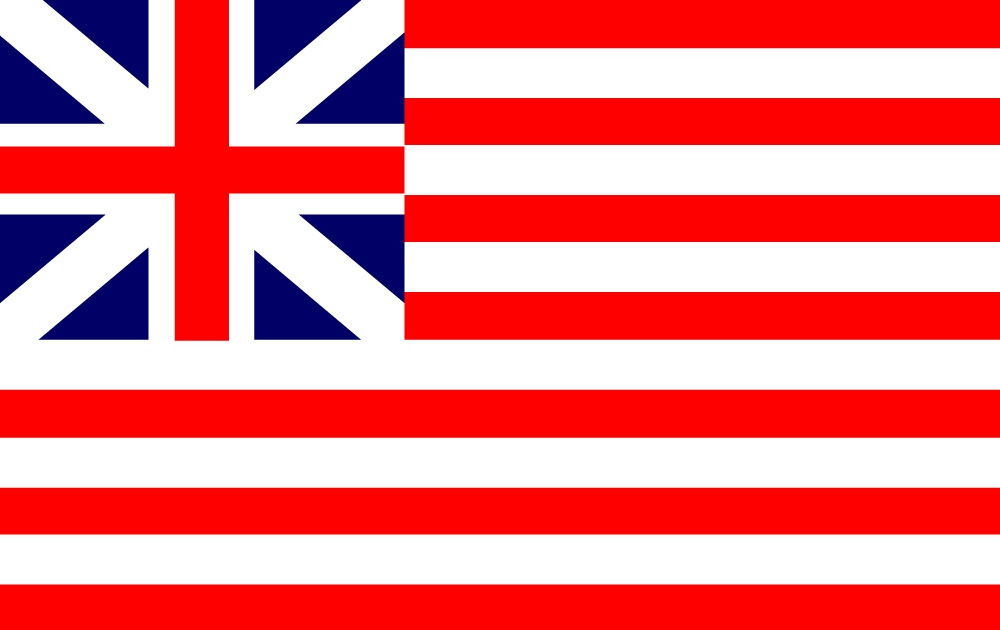

In [4]:
from IPython.display import Image
Image(filename='/home/francesco/Backup/home/cesco/Desktop/book_entirety/ch4_final/images/B04209_04_03.png')

And the resulting output images are pretty much the same.

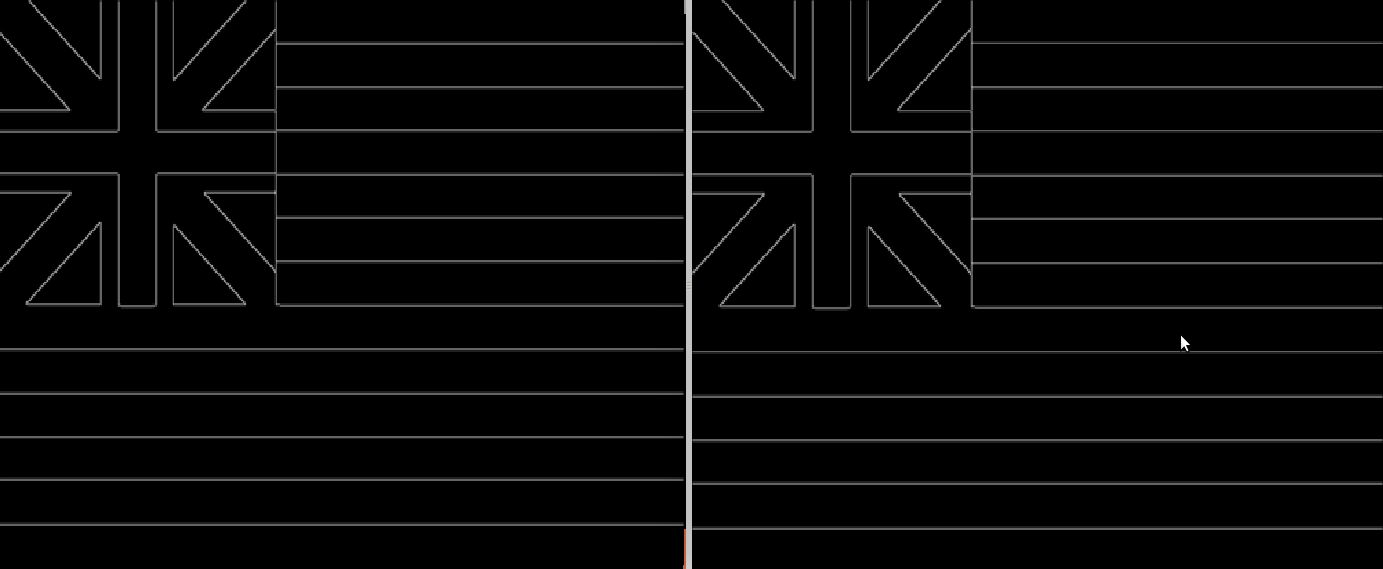

In [3]:
from IPython.display import Image
Image(filename='/home/francesco/Backup/home/cesco/Desktop/book_entirety/ch4_final/images/B04209_04_04.png')

## A very brief introduction to CUDA C Code 

In [ ]:
//hello_gpu.cu

#include <stdio.h>
#include <cuda_runtime.h>

__global__ void hello_gpu(void) {
}

int main(void) {
hello_gpu<<<1,1>>>();
printf("Hello GPU!\n");
return 0;
}

The call from the host is made by the following line of code,

hello_gpu<<<1,1>>>();

the <<<1,1>>>() represents the amount of blocks and threads. In this case the host call tells the GPU to run 1 block, with 1 thread in it.  A block is the entity that gets executed by the stream multiprocessor.  Threads included in the block, can be organized in a x,y,z 3-D configuration composed of no more than 1024 threads per block for modern GPUs. All threads in a grid execute the same function (kernel). A grid is configured into two dimensional arrays of blocks.  All blocks in a grid have the same dimension.  Threads and blocks have indices. A thread index consists of a triplet containing three unsigned integers.  A block index consists of a pair of unsigned integers.

After saving the file into a file called hello.cu, one can compile this file, and create an executable file with the following command,

shell$ nvcc  hello.cu -o hello_gpu

Notice that instead of compiling the code with gcc or g++ as it is done for compiling typical C/C++ code, we instead use: nvcc hello_gpu.cu -o hello_gpu to compile and create the object file.  NVCC is the Nvidia CUDA Compiler whose primary role is to hide from the developer,  the under-the-hood details of CUDA compilation, all the while mimicking the behavior of the GNU gcc compiler.

This command will create an executable called hello_gpu, which you can run by entering the following command,

shell$ ./hello_gpu

## An introduction to PyCuda

PyCuda is a Python wrapper that makes it easy to access the CUDA parallel computation API from Python.  We will be using PyCuda to access the CUDA api, and the OpenCV library. PyCuda combines portions of  CUDA C kernel code to execute GPU code on the GPU, and Python to do everything else in the program.  
PyCuda provides Python programmers a Python interface that access Nvidia's CUDA application programming interface.  It uses Python's clean and efficient syntax to execute code in CUDA-enabled GPUs.  It brings some of Python's popular features which include garbage collection, as well as taking the error checking responsibility away from the programmer, as it does it automatically without user input. 
If using linux, you can download the .tar that contains PyCuda here,: 

https://pypi.python.org/pypi/pycuda

or if you have the setuptools package installed on your computer, you can use PIP directly from the terminal in order to have pip install it for you.
For help with the installation of PyCuda on a Unix-like machine, visit the following link:

http://wiki.tiker.net/PyCuda/Installation/Linux

When using a Unix-like machine, in order to use PyCuda, you need to make sure that you have the following:

Cuda Toolkit - install the CUDA toolkit from Nvidia at this link,

               	https://developer.nvidia.com/cuda-toolkit
                
              	Once there, you can download the Nvidia developer's Getting Started Guide which includes a lot of useful information. A C++ compiler - you can download it here: 
                
                https://gcc.gnu.org/ 
                
                
                - preferably a version 4.x gcc 
                - A working Python installation 
                - A version 2.4 or newer
                - A recent version of Numpy

In order to use the GPU module found in OpenCV, you need to make sure that during the OpenCV build process, you use the 

                -CUDA=ON flag.  
        
This also applies for OpenCL, make sure that the  OpenCL flag is turned on. 

In the following program we use a very simple program to illustrate how PyCuda can access the GPU in our system.  In this program we first import PyCuda, and its required modules for initialization.

In [ ]:
//add_five.py

#!/usr/bin/env python

import pycuda.driver as cuda
import pycuda.tools
import pycuda.autoinit
import numpy as np
from pycuda.compiler import SourceModule

# cuda code between the quotes that makes the addition possible
mod = SourceModule("""
__global__ void add_five(float *dest, float *a)
{
  const int i = threadIdx.x;
    dest[i] = 5.+ a[i];
}
""")
# get the function add_five
add_five = mod.get_function("add_five")
# random production of 50 random numbers
a = np.random.randn(50).astype(np.float32)
# destination for the answer in the same dimensions of the random-produced saved in a
dest = np.zeros_like(a)
add_five(
        cuda.Out(dest), cuda.In(a),
        block=(50,1,1), grid=(1,1))
# print the random-generated numbers
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
print a
# print the random-generated numbers + the added value (5)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
print dest

This code will display the generation of 50 random numbers, produced by np.random.randn(50) function.  When we use CUDA, it is safer to use floating precision (np.float32)  numbers for compatibility with older GPUs. We then add five to each one of these random numbers, and display both outputs in the screen.

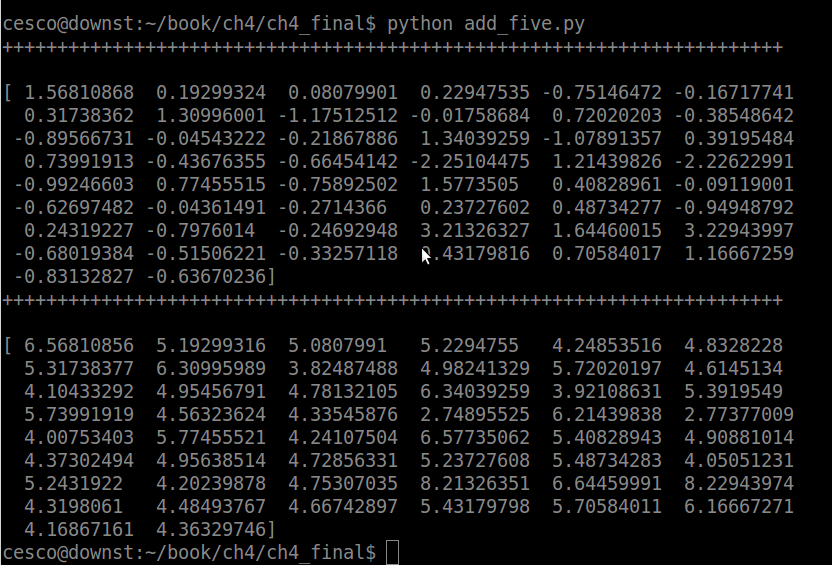

In [2]:
from IPython.display import Image
Image(filename='/home/francesco/Backup/home/cesco/Desktop/book_entirety/ch4_final/images/B04209_04_05.png')

In the last program we used a very simple numerical computation to illustrate how PyCuda accesses the CUDA API.  We can also use numpy arrays, or images. In the following program, we will use the CPU for converting an image, and then we will use a GPU to perform the same operation.

In [ ]:
//cpu1.py

import numpy as np
from matplotlib import pyplot as plt
from pylab import *
from PIL import Image

image = Image.open("providence.png")
image_array_rgb = np.array(image)
r,g,b = np.split(image_array_rgb, 3, axis=2)
a = np.ones_like(r) * 255
image_array_rgba = np.concatenate((r,g,b,a), axis=2).copy()
image_array_greyscale_cpu_result = \
    (image_array_rgba[:,:,0].astype(np.uint32) + \
     image_array_rgba[:,:,1].astype(np.uint32) + \
     image_array_rgba[:,:,2].astype(np.uint32)) / 3
rcParams['figure.figsize'] = 20,4
plt.subplot(121)
plt.imshow(image_array_rgba);
plt.title("Source Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(image_array_greyscale_cpu_result, cmap="gray")
plt.title("Greyscale CPU Result"), plt.xticks([]), plt.yticks([])
plt.show()

By looking at the code we can see that we imported the image with the PIL library.  We converted it into a numpy array, split it into its r, g, b, color channels.  Created an a Numpy array in the same dimension of r, and filled with ones, np.ones_like(r) . We added all of them together and copied them, and then added them, and obtained the average.  We then saved the result in the image_array_rgba variable. The plotting produced the following result,

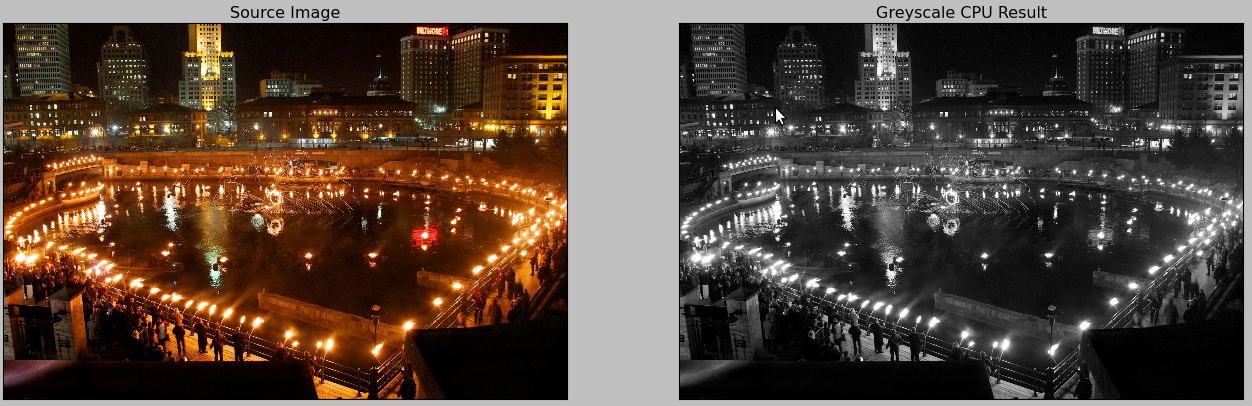

In [4]:
from IPython.display import Image
Image(filename='/home/francesco/Backup/home/cesco/Desktop/book_entirety/ch4_final/images/B04209_04_06.png')

Now we will proceed to perform the same code on the GPU, with some additional steps that must be taken, as we did with the add_five.py code of the previous example.

In [ ]:
//gpu1.py

from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from pylab import *
import pycuda.autoinit
import pycuda.driver
import pycuda.compiler

image = Image.open("providence.png")
image_array_rgb = np.array(image)
r,g,b = np.split(image_array_rgb, 3, axis=2)
a = np.ones_like(r) * 255
image_array_rgba = np.concatenate((r,g,b,a), axis=2).copy()
image_array_greyscale_cpu_result = \
    (image_array_rgba[:,:,0].astype(np.uint32) + \
     image_array_rgba[:,:,1].astype(np.uint32) + \
     image_array_rgba[:,:,2].astype(np.uint32)) / 3
image_array_greyscale_gpu_result = np.zeros_like(a).squeeze()
source_module = pycuda.compiler.SourceModule \
(
"""
__global__ void color_to_greyscale(
    unsigned char* d_greyscale,
    uchar4* d_color,
    int num_pixels_y,
    int num_pixels_x )
{
    int ny = num_pixels_y;
    int nx = num_pixels_x;
    int2 image_index_2d = make_int2( ( blockIdx.x * blockDim.x ) + threadIdx.x, ( blockIdx.y * blockDim.y ) + threadIdx.y );
    int image_index_1d = ( nx * image_index_2d.y ) + image_index_2d.x;
    if ( image_index_2d.x < nx && image_index_2d.y < ny )
    {
        uchar4 color = d_color[ image_index_1d ];
        unsigned int greyscale = ( color.x + color.y + color.z ) / 3;
        d_greyscale[ image_index_1d ] = (unsigned char)greyscale;
    }

}
"""
)
color_to_greyscale_function = source_module.get_function("color_to_greyscale")
start_timer = pycuda.driver.Event()
end_timer = pycuda.driver.Event()
num_pixels_y = np.int32(image_array_rgba.shape[0])
num_pixels_x = np.int32(image_array_rgba.shape[1])
color_to_greyscale_function_block = (32,16,1)
num_blocks_y = int(ceil(float(num_pixels_y) / float(color_to_greyscale_function_block[1])))
num_blocks_x = int(ceil(float(num_pixels_x) / float(color_to_greyscale_function_block[0])))
color_to_greyscale_function_grid  = (num_blocks_x, num_blocks_y)
image_array_rgba_device = pycuda.driver.mem_alloc(image_array_rgba.nbytes)
image_array_greyscale_device = pycuda.driver.mem_alloc(image_array_greyscale_gpu_result.nbytes)
pycuda.driver.memcpy_htod(image_array_rgba_device, image_array_rgba)
pycuda.driver.memcpy_htod(image_array_greyscale_device, image_array_greyscale_gpu_result)
color_to_greyscale_function(
    image_array_greyscale_device,
    image_array_rgba_device,
    num_pixels_y,
    num_pixels_x,
    block=color_to_greyscale_function_block,
    grid=color_to_greyscale_function_grid)

pycuda.driver.memcpy_dtoh(image_array_greyscale_gpu_result, image_array_greyscale_device)
rcParams['figure.figsize'] = 20,4
plt.subplot(121)
plt.imshow(image_array_rgba);
plt.title("Source Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(image_array_greyscale_gpu_result, cmap="gray", vmin=0, vmax=255);
plt.title("image_array_greyscale_gpu_result"), plt.xticks([]), plt.yticks([])
plt.show()

The first portion of the code it is very similar to the one we programmed for the CPU.  The CUDA code includes the number of pixels in the x an y dimensions, the block and grid for the destination image.  The timer pycuda.driver.Event()  allows for the start of a timer for benchmarking purposes. 

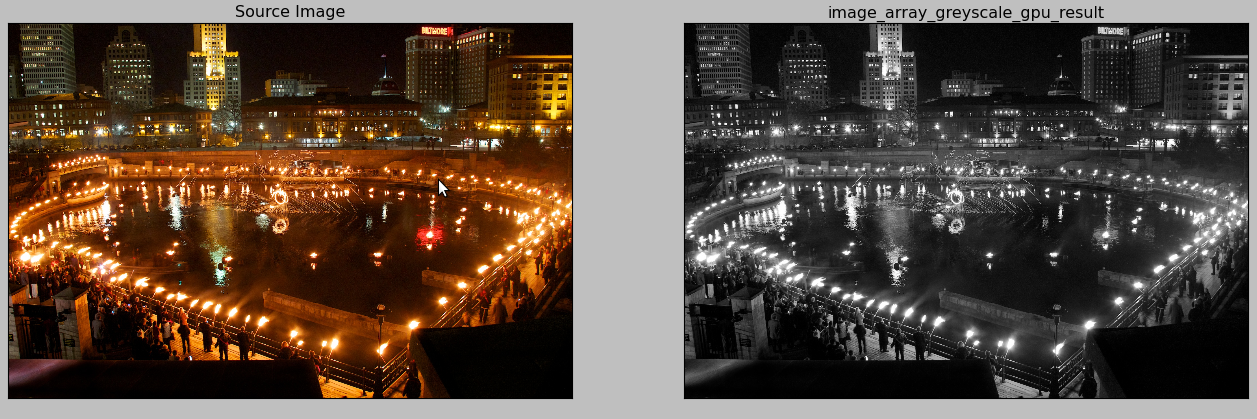

In [5]:
from IPython.display import Image
Image(filename='/home/francesco/Backup/home/cesco/Desktop/book_entirety/ch4_final/images/B04209_04_07.png')

In the following program we will run the same program using the CPU and GPU, and use the benchmarking program in conjunction with the timer program to get an idea on how they compare with each other. We will first use the CPU benchmarking program,

In [ ]:
//cpu_benchmarking.py

import numpy as np
from matplotlib import pyplot as plt
from pylab import *
import sys
import time
from PIL import Image

image = Image.open("providence.png")
image_array_rgb = np.array(image)
r,g,b = np.split(image_array_rgb, 3, axis=2)
a = np.ones_like(r) * 255
image_array_rgba = np.concatenate((r,g,b,a), axis=2).copy()

if sys.platform == "win32":
    print "Using time.clock for benchmarking...\n"
    system_timer_function = time.clock
else:
    print "Using time.time for benchmarking...\n"
    system_timer_function = time.time
num_timing_iterations = 100
print "num_timing_iterations = %d" % num_timing_iterations
total_time_seconds = 0
image_array_rgba_uint32 = image_array_rgba.astype(np.uint32)

for i in range(num_timing_iterations):
    start_time_seconds = system_timer_function()
    image_array_greyscale_cpu_result = \

        (image_array_rgba_uint32[:,:,0] + image_array_rgba_uint32[:,:,1] + 
                         image_array_rgba_uint32[:,:,2]) / 3
    end_time_seconds = system_timer_function()
    elapsed_time_seconds = (end_time_seconds - start_time_seconds)
           total_time_seconds = total_time_seconds + elapsed_time_seconds
average_time_seconds_cpu = total_time_seconds / num_timing_iterations

print "Using system timer for benchmarking (see above)..."
print "Average time elapsed executing color to greyscale conversion on the CPU over %d runs: %f s" % (num_timing_iterations,average_time_seconds_cpu)
print

rcParams['figure.figsize'] = 6,4
plt.imshow(image_array_greyscale_cpu_result, cmap="gray", vmin=0, vmax=255);
plt.title("image_array_greyscale_cpu_result")
plt.show()

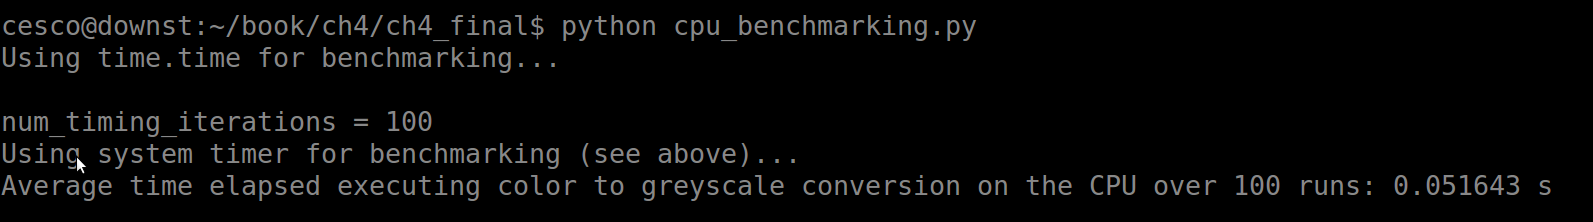

In [1]:
from IPython.display import Image
Image(filename='/home/francesco/Backup/home/cesco/Desktop/book_entirety/ch4_final/images/B04209_04_08.png')

As we can see after 100 iterations, the average is 0.051643 seconds.  If we now run the following GPU code, we can compare the averages for the CPU and the GPU,

In [ ]:
//gpu_benchmarking.py

import numpy
from matplotlib import pyplot
from pylab import *
import pycuda.autoinit
import pycuda.driver
import pycuda.compiler
import sys
import time
from PIL import Image

image = Image.open("providence.png")
image_array_rgb = np.array(image)
r,g,b = np.split(image_array_rgb, 3, axis=2)
a = np.ones_like(r) * 255
image_array_rgba = np.concatenate((r,g,b,a), axis=2).copy()

if sys.platform == "win32":
    print "Using time.clock for benchmarking...\n"
    system_timer_function = time.clock
else:
    print "Using time.time for benchmarking...\n"
    system_timer_function = time.time
    
num_timing_iterations = 100

print "num_timing_iterations = %d" % num_timing_iterations

total_time_seconds = 0
image_array_greyscale_gpu_result = np.zeros_like(a).squeeze()
source_module = pycuda.compiler.SourceModule \
(
"""
__global__ void color_to_greyscale(
    unsigned char* d_greyscale,
    uchar4* d_color,
    int num_pixels_y,
    int num_pixels_x )
{
    int ny = num_pixels_y;
    int  nx = num_pixels_x;
    int2 image_index_2d = make_int2( ( blockIdx.x * blockDim.x ) + threadIdx.x, ( blockIdx.y * blockDim.y ) + threadIdx.y );
    int  image_index_1d = ( nx * image_index_2d.y ) + image_index_2d.x;
    if ( image_index_2d.x < nx && image_index_2d.y < ny )
    {
        uchar4 color = d_color[ image_index_1d ];
        unsigned int greyscale = ( color.x + color.y + color.z ) / 3;
        d_greyscale[ image_index_1d ] = (unsigned char)greyscale;
    }
}
"""
)

color_to_greyscale_function = source_module.get_function("color_to_greyscale")
start_timer = pycuda.driver.Event()
end_timer = pycuda.driver.Event()
num_pixels_y = np.int32(image_array_rgba.shape[0])
num_pixels_x = np.int32(image_array_rgba.shape[1])
color_to_greyscale_function_block = (32,16,1)
num_blocks_y = int(ceil(float(num_pixels_y) / float(color_to_greyscale_function_block[1])))
num_blocks_x = int(ceil(float(num_pixels_x) / float(color_to_greyscale_function_block[0])))
color_to_greyscale_function_grid  = (num_blocks_x, num_blocks_y)


image_array_rgba_device = pycuda.driver.mem_alloc(image_array_rgba.nbytes)
image_array_greyscale_device = pycuda.driver.mem_alloc(image_array_greyscale_gpu_result.nbytes)
pycuda.driver.memcpy_htod(image_array_rgba_device, image_array_rgba)
pycuda.driver.memcpy_htod(image_array_greyscale_device, image_array_greyscale_gpu_result)

color_to_greyscale_function(
    image_array_greyscale_device,
    image_array_rgba_device,
    num_pixels_y,
    num_pixels_x,
    block=color_to_greyscale_function_block,
    grid=color_to_greyscale_function_grid)

pycuda.driver.memcpy_dtoh(image_array_greyscale_gpu_result, image_array_greyscale_device)

for i in range(num_timing_iterations):
    pycuda.driver.memcpy_htod(image_array_greyscale_device, image_array_greyscale_gpu_result)
    pycuda.driver.Context.synchronize()
    start_time_seconds = system_timer_function()
    color_to_greyscale_function(
        image_array_greyscale_device,
        image_array_rgba_device,
        num_pixels_y,
        num_pixels_x,
        block=color_to_greyscale_function_block,
        grid=color_to_greyscale_function_grid)


    pycuda.driver.Context.synchronize()
    end_time_seconds = system_timer_function()
    elapsed_time_seconds = end_time_seconds - start_time_seconds
    total_time_seconds = total_time_seconds + elapsed_time_seconds
pycuda.driver.memcpy_dtoh(image_array_greyscale_gpu_result, image_array_greyscale_device)
average_time_seconds_gpu = total_time_seconds / num_timing_iterations
total_time_seconds  = 0
image_array_rgba_uint32 = image_array_rgba.astype(np.uint32)

for i in range(num_timing_iterations):
    start_time_seconds = system_timer_function()
    image_array_greyscale_cpu_result = \
        (image_array_rgba_uint32[:,:,0] + image_array_rgba_uint32[:,:,1] + image_array_rgba_uint32[:,:,2]) / 3
    end_time_seconds = system_timer_function()
    elapsed_time_seconds = (end_time_seconds - start_time_seconds)
    total_time_seconds = total_time_seconds + elapsed_time_seconds
average_time_seconds_cpu = total_time_seconds / num_timing_iterations

print "Using system timer for benchmarking (see above)..."
print "Average time elapsed executing color_to_greyscale GPU kernel over %d runs: %f s" % (num_timing_iterations,average_time_seconds_gpu)
print
rcParams['figure.figsize'] = 6,4
plt.imshow(image_array_greyscale_gpu_result, cmap="gray", vmin=0, vmax=255);
plt.title("image_array_greyscale_gpu_result");
plt.show()
gpu_speedup = average_time_seconds_cpu / average_time_seconds_gpu
print "Average CPU time: %f s" % average_time_seconds_cpu
print "Average GPU time: %f s" % average_time_seconds_gpu
print "GPU speedup:      %f x" % gpu_speedup


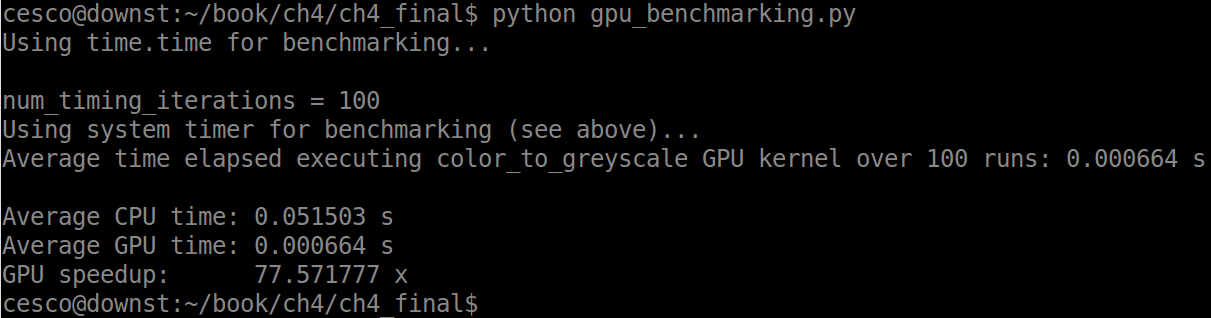

In [2]:
from IPython.display import Image
Image(filename='/home/francesco/Backup/home/cesco/Desktop/book_entirety/ch4_final/images/B04209_04_09.png')

## A Red-Eye Removal Project using PyCuda